Let's get a look at the files

In [41]:
!ls ../model_data

best_maestro_model_2_1_512_0pt3_lr_5e-04_cn_0pt5.csv
best_maestro_model_2_1_512_0pt4.csv
best_maestro_model_2_1_512_0pt4_cn_0pt5.csv
best_maestro_model_2_1_512_0pt4_cn_1pt0.csv
best_maestro_model_2_1_512_0pt4_cv_None.csv
best_maestro_model_2_1_512_0pt4_lr_5e-04.csv
best_maestro_model_2_1_512_0pt4_lr_5e-04_cn_0pt25.csv
best_maestro_model_2_1_512_0pt4_lr_5e-04_cn_0pt5.csv
gradients_2_1_512_0pt4.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
path = '../model_data/'
filepath = path + 'best_maestro_model_2_1_512_0pt4.csv'
df_base = pd.read_csv(filepath, index_col = 'Epochs')
filepath = path + 'best_maestro_model_2_1_512_0pt4_lr_5e-04.csv'
df_lr = pd.read_csv(filepath, index_col = 'Epochs')
filepath = path + 'best_maestro_model_2_1_512_0pt4_cn_1pt0.csv'
df_cn_1 = pd.read_csv(filepath, index_col = 'Epochs')
filepath = path + 'best_maestro_model_2_1_512_0pt4_cn_0pt5.csv'
df_cn_pt5 = pd.read_csv(filepath, index_col = 'Epochs')
filepath = path + 'best_maestro_model_2_1_512_0pt4_lr_5e-04_cn_0pt5.csv'
df_lr_cn_pt5 = pd.read_csv(filepath, index_col = 'Epochs')
filepath = path + 'best_maestro_model_2_1_512_0pt4_lr_5e-04_cn_0pt25.csv'
df_lr_cn_pt25 = pd.read_csv(filepath, index_col = 'Epochs')

In [26]:
var_name_to_axis_name = {'maestro_loss': 'Training Loss', 'val_maestro_loss': 'Validation Loss'}

In [35]:
def plot_comparison(dfs, labels, var = 'val_maestro_loss', title = None, ylim = None):
    """plot lines (maximum 6) for var versus Epoch, one for each dataframe in a list of 
    dataframes(dfs) with corresponding labels. Add title (str) and ylim if passed."""
    if (len(labels) != len(dfs)):
        print('dfs and labels are different length, abort.')
        return
    colors = ['r', 'b', 'k', 'c', 'y', 'm']
    if (len(dfs) > len(colors)):
        print('Input more dataframes than available colors, abort.')
    plt.figure(figsize = (12, 6))
    for i in range(len(dfs)):
        plt.plot(dfs[i][var], colors[i], label = labels[i])
    plt.xlabel('Epoch')
    plt.ylabel(var_name_to_axis_name[var])
    if (type(title) == str):
        plt.title(title)
    if (type(ylim) == tuple):
        plt.ylim(ylim)
    plt.legend()

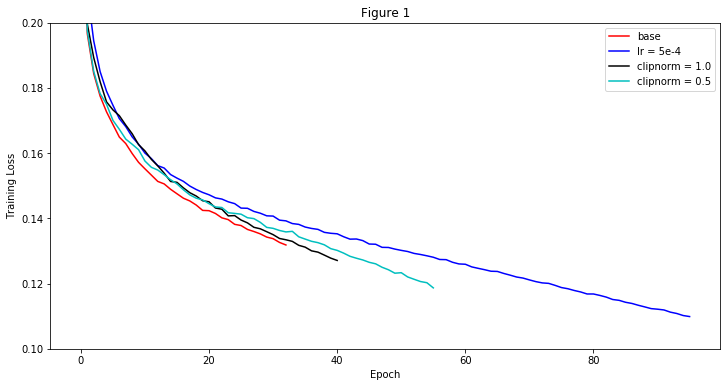

In [36]:
plot_comparison([df_base, df_lr, df_cn_1, df_cn_pt5], labels = ['base', 'lr = 5e-4', 'clipnorm = 1.0', 'clipnorm = 0.5'], \
                var = 'maestro_loss', title = 'Figure 1', ylim = (0.1, 0.2))

In Figure 1, we plot the Training Loss across Epochs. Note that the base model learns the training set the fastest, as expected, but suffers from exploding gradients the earliest. Lowering the learning rate to half its default value had the strongest effect, but using clipnorm produces a similar (although weaker) effect.

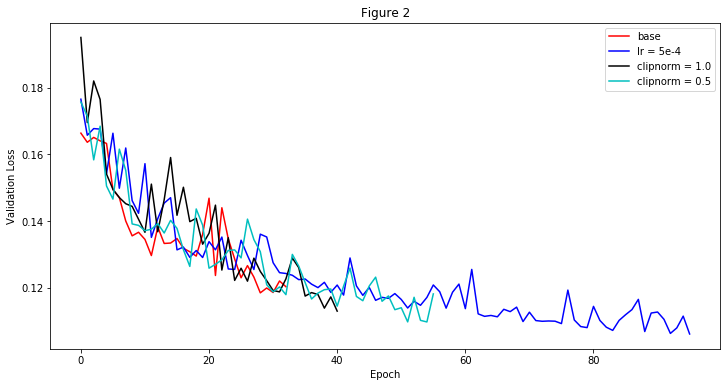

In [37]:
plot_comparison([df_base, df_lr, df_cn_1, df_cn_pt5], labels = ['base', 'lr = 5e-4', 'clipnorm = 1.0', 'clipnorm = 0.5'], \
                var = 'val_maestro_loss', title = 'Figure 2')

In Figure 2, we plot the Validation Loss versus time for the same models. The same trends can be seen, but the training is much noisier since the network is not minimizing Validation Loss.

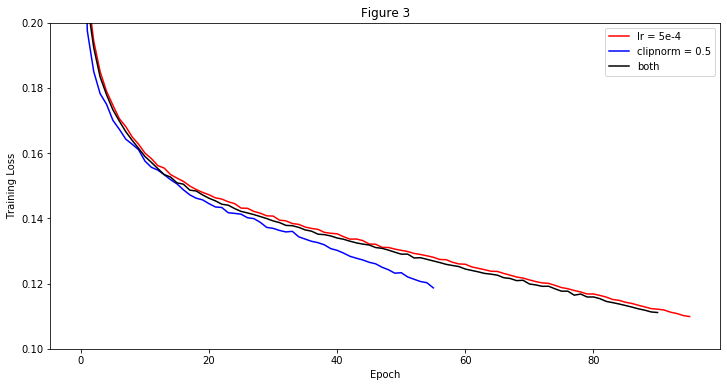

In [38]:
plot_comparison([df_lr, df_cn_pt5, df_lr_cn_pt5], labels = ['lr = 5e-4', 'clipnorm = 0.5', 'both'], \
                var = 'maestro_loss', title = 'Figure 3', ylim = (0.1, 0.2))

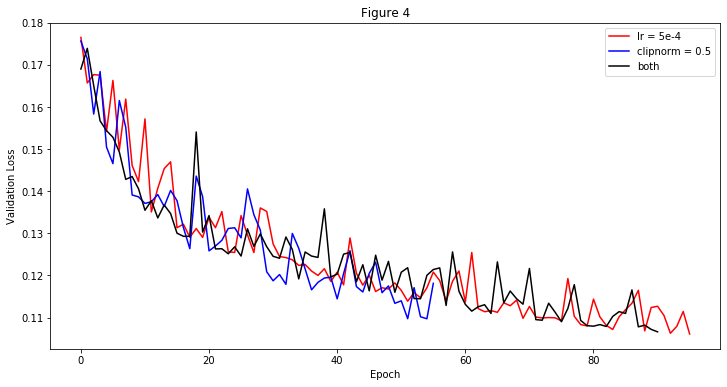

In [39]:
plot_comparison([df_lr, df_cn_pt5, df_lr_cn_pt5], labels = ['lr = 5e-4', 'clipnorm = 0.5', 'both'], \
                var = 'val_maestro_loss', title = 'Figure 4')

In [40]:
df_lr['val_maestro_loss'].min()

0.10611774027347563

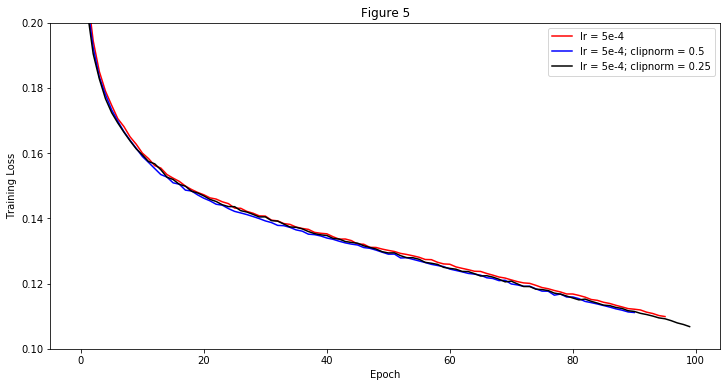

In [44]:
plot_comparison([df_lr, df_lr_cn_pt5, df_lr_cn_pt25], labels = ['lr = 5e-4', 'lr = 5e-4; clipnorm = 0.5', \
                'lr = 5e-4; clipnorm = 0.25'], var = 'maestro_loss', title = 'Figure 5', ylim = (0.1, 0.2))

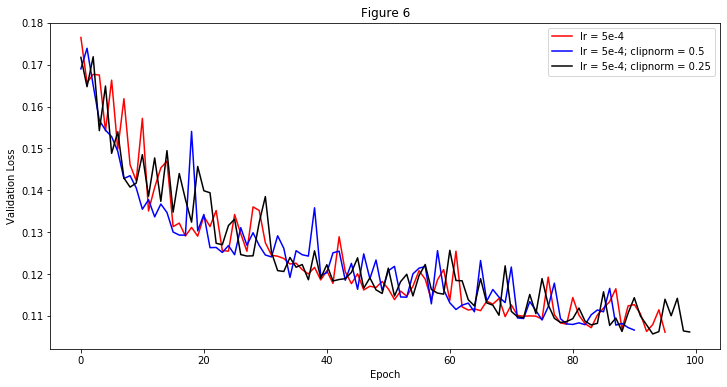

In [45]:
plot_comparison([df_lr, df_lr_cn_pt5, df_lr_cn_pt25], labels = ['lr = 5e-4', 'lr = 5e-4; clipnorm = 0.5', \
                'lr = 5e-4; clipnorm = 0.25'], var = 'val_maestro_loss', title = 'Figure 6')